# Author : Sai Krishna Jaligama
## Task 2: Prediction using UnSupervised Machine Learning
## Problem Statement: Predict the optimum number of clusters and represent visually from the given dataset. 

### Clustering is the type of unsupervised machine learning.It is the task of dividing the data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups where each group is called as a cluster.

## Step 1: Importing the Libraries 

In [1]:
# importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 

## Step 2: Understanding the DataSet

In [2]:
# Loading the dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df_target = pd.DataFrame(iris.target, columns = ['Target'])
print("Data imported sucessfully")

Data imported sucessfully


In [3]:
# No. of rows and columns of in the dataset
df.shape

(150, 4)

In [4]:
# First 5 rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Target values
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
# Feature names
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
df_target.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [8]:
# Data is divided into attributes and labels
# X is independent variable and y is dependent variable
X = df.iloc[:, [0, 1, 2, 3]].values  
y = df_target.iloc[:, 0].values  
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## Step 3: Finding the optimum number of clusters for k-means classification

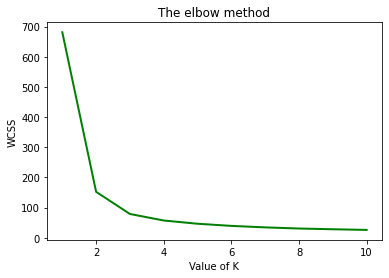

In [9]:
X=df.iloc[:, [0, 1, 2, 3]].values
wcss=[]
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 300) 
    KM.fit(X) 
      
    # calculates squared error for the clustered points 
    wcss.append(KM.inertia_)      
  
# plot the wcss against K values 
plt.plot(range(1, 11), wcss, color ='g', linewidth ='2') 
plt.title('The elbow method')
plt.xlabel("Value of K") 
plt.ylabel("WCSS") 
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k 

From the above graph we can see that there is no significance decrease of the value of  within cluster sum of squares (WCSS) from the value of K=3.
Hence the optimal number of clusters is 3 from the "Elbow Method"

## Step 4: Applying kmeans to the dataset

In [18]:
#KMeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

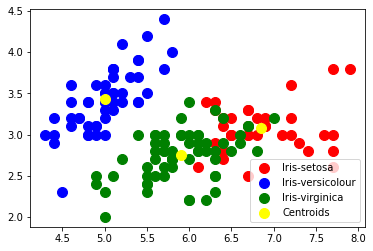

In [33]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')
plt.legend()


## Step 5: Evaluating the performance of the model

In [30]:
#The final step is to evaluate the performance of the algorithm. 
#This step is particularly important to compare how well different algorithms perform on a particular dataset
iris_k_mean = KMeans(n_clusters=3)
iris_k_mean.fit(X)
predict_y = np.choose(iris_k_mean.labels_ , [1,0,2]).astype(np.int64)
print("Accuracy:",sm.accuracy_score(predict_y, df_target['Target']))

Accuracy: 0.8933333333333333


## Conclusion

###          Thus from the elbow method we can conclude that 3 is the optimal number of clusters required for evaluating the model. The accuaracy achieved with the clustering is 0.89 . 